<a href="https://colab.research.google.com/github/SP-TechForest/House_Price_Prediction/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np 
import plotly.express as px 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
org_data  = pd.read_csv("Bengaluru_House_Data.csv")
data = org_data.copy()

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape

(13320, 9)

In [6]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
data.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [8]:
data.bath.value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [9]:
px.histogram(data.price)

In [10]:
null_columns = data.columns[data.isna().any()]

In [11]:
def find_null(data):
  null_columns = data.columns[data.isna().any()]
  null_data = pd.DataFrame(data = 
                           {"Column":data.columns[data.isna().any()], 
                            "Null_value(avg)":data[null_columns].isna().mean()*100, 
                            "Null_value(sum)":data[null_columns].isna().sum()}
                          )
  return null_data

In [12]:
find_null(data)

,Column,Null_value(avg),Null_value(sum)
location,location,0.007508,1
size,size,0.120120,16
society,society,41.306306,5502
bath,bath,0.548048,73
balcony,balcony,4.572072,609


###On the bases of the analysis of the data above, I can provide three conviction. 
<li>Data consists total of 9 columns and 13320 numbers of row</li> 
<li>There are lots of outliers in Bath column, and no outlier in Balcony column. 
<li>On the bases of histogram, i can say that there might be an outliers in price column also, though, it is an independent variable, we need to check it deeply. 
<li>Importantly, this data set has few outliers in 5 columns out of 9. In which, Location, size, bath and balcony have very minimal amount of outliers. However, Scociety has around <u><b>41%</b></u> Outliers. Therefore, i have decided to remove the whole column. 

In [13]:
data.drop(columns = ["society"], inplace=True)

In [14]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [15]:
find_null(data)

,Column,Null_value(avg),Null_value(sum)
location,location,0.007508,1
size,size,0.120120,16
bath,bath,0.548048,73
balcony,balcony,4.572072,609


##Dealing with four columns which have null values. 
If we combine the number of total null values, then, it would be around 700, and all the null values are in different rows, which is in the worst case and if we delete all the rows having null columns then also we have more than <b>12500</b> rows, which is certainly enough for training any of the machine learning model.

In [16]:
data.dropna(inplace=True)

In [17]:
data.shape

(12710, 8)

In [18]:
find_null(data)

,Column,Null_value(avg),Null_value(sum)


##Clean area_type column, and check if it has any co-relation with price

In [19]:
data.area_type.value_counts()

Super built-up  Area    8481
Built-up  Area          2310
Plot  Area              1837
Carpet  Area              82
Name: area_type, dtype: int64

In [20]:
data.groupby(["area_type"])["price"].mean()

area_type
Built-up  Area           99.646126
Carpet  Area             81.764695
Plot  Area              196.560484
Super built-up  Area     88.440469
Name: price, dtype: float64

In [21]:
data["area_type"] = data["area_type"].apply(lambda x: x.split(' ')[0])

In [22]:
data.area_type.unique()

array(['Super', 'Plot', 'Built-up', 'Carpet'], dtype=object)

In [23]:
data.area_type.replace('Super','Super-Built-up', inplace=True)

In [24]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["area_type_le"] = label_encoder.fit_transform(data["area_type"])

In [25]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,area_type_le
0,Super-Built-up,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,3
1,Plot,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2
2,Built-up,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,0
3,Super-Built-up,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super-Built-up,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,3


In [26]:
data.corr()

,bath,balcony,price,area_type_le
bath,1.000000,0.204191,0.459736,-0.098645
balcony,0.204191,1.000000,0.120363,0.097129
price,0.459736,0.120363,1.000000,-0.061409
area_type_le,-0.098645,0.097129,-0.061409,1.000000


####On the bases of co-relation result, we can say that area_type column has no relation with price and it cannot impact the result in predictive manner. Therefore, I am removing this column, and availability column 

In [27]:
data.drop(columns = ["area_type", "area_type_le","availability"],axis=0, inplace = True)

In [28]:
data.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

##Prepare balcony column for next process

In [29]:
px.box(y= data.balcony)

In [30]:
data.balcony.value_counts()
#There is nothing to do with balcony. 

2.0    5112
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

##Pre-processing of bath column 

In [31]:
data.bath.value_counts()

2.0     6834
3.0     3145
4.0     1108
1.0      786
5.0      430
6.0      244
7.0       82
8.0       42
9.0       27
10.0       6
27.0       1
11.0       1
12.0       1
40.0       1
15.0       1
13.0       1
Name: bath, dtype: int64

In [32]:
px.box(y = data.bath)

In [33]:
px.histogram(x = data.bath)

In [34]:
# we are removing all the records which have more than 10 bathrooms
data = data.drop(data[data["bath"]>=10].index)

In [35]:
data.shape

(12698, 6)

In [36]:
data.bath.value_counts()

2.0    6834
3.0    3145
4.0    1108
1.0     786
5.0     430
6.0     244
7.0      82
8.0      42
9.0      27
Name: bath, dtype: int64

##Working on size and sq.feel columns 

In [37]:
data["size"].value_counts()

2 BHK         5152
3 BHK         4128
4 Bedroom      749
1 BHK          530
3 Bedroom      527
4 BHK          489
2 Bedroom      328
5 Bedroom      263
6 Bedroom      169
1 Bedroom      105
7 Bedroom       69
8 Bedroom       61
5 BHK           36
9 Bedroom       28
6 BHK           23
7 BHK           16
1 RK            13
9 BHK            4
8 BHK            3
10 Bedroom       2
11 BHK           1
11 Bedroom       1
12 Bedroom       1
Name: size, dtype: int64

In [38]:
data['size'].apply(lambda x: x.strip())

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13314        3 BHK
13315    5 Bedroom
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 12698, dtype: object

In [39]:
data['BHK'] = data['size'].apply(lambda x: x.split(' ')[0])

In [40]:
data['BHK'].value_counts()

2     5480
3     4655
4     1238
1      648
5      299
6      192
7       85
8       64
9       32
11       2
10       2
12       1
Name: BHK, dtype: int64

In [41]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [42]:
temp = data.copy()

In [43]:
def conv(x):
  arr = x.split('-')
  if len(arr) == 2:
      avg = (float(arr[0]) + float(arr[1]))/2
      return avg
  else:
    try:
      return float(arr[0])
    except:
      return None

In [44]:
data['total_sqft'] = data['total_sqft'].apply(lambda x: conv(x))


In [45]:
data.isna().sum()

location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
BHK            0
dtype: int64

In [46]:
null_index = data[data['total_sqft'].isna()].index

In [47]:
temp.total_sqft[null_index]

410       34.46Sq. Meter
775        1000Sq. Meter
1019           5.31Acres
1086             30Acres
1400        716Sq. Meter
1712       1500Sq. Meter
1743     142.61Sq. Meter
1821       1574Sq. Yards
2881        117Sq. Yards
3228       3040Sq. Meter
3285        500Sq. Yards
4113        167Sq. Meter
5453              3Cents
5537     188.89Sq. Yards
5631        204Sq. Meter
5668         45Sq. Yards
5708      133.3Sq. Yards
5976      78.03Sq. Meter
6268        122Sq. Yards
6303      84.53Sq. Meter
6333           2.09Acres
6552            24Guntha
6592        697Sq. Meter
6953     142.61Sq. Meter
7001           1500Cents
7248        132Sq. Yards
7334              2Acres
7520       1100Sq. Meter
7607             15Acres
7726           1.26Acres
8273     151.11Sq. Yards
9423            1Grounds
9519       2940Sq. Yards
9734      45.06Sq. Meter
10488          1.25Acres
10491     86.72Sq. Meter
11320           38Guntha
11615             6Acres
12186       120Sq. Yards
12252        24Sq. Meter


In [48]:
data.dropna(inplace=True)

In [49]:
data.isna().any()

location      False
size          False
total_sqft    False
bath          False
balcony       False
price         False
BHK           False
dtype: bool

In [50]:
data.shape
data['BHK']=data['BHK'].astype('float')

In [51]:
temp_data = data[data['total_sqft']/data['BHK']>300]

In [52]:
temp_data.BHK.value_counts()

2.0     5403
3.0     4544
4.0      971
1.0      633
5.0      158
6.0       73
7.0       34
8.0       17
9.0        9
11.0       1
10.0       1
Name: BHK, dtype: int64

In [53]:
data.BHK.value_counts()

2.0     5471
3.0     4641
4.0     1235
1.0      639
5.0      295
6.0      191
7.0       85
8.0       63
9.0       31
11.0       2
10.0       2
12.0       1
Name: BHK, dtype: int64

##Clean Location Column

In [54]:
px.box(y = temp_data.total_sqft)

In [55]:
temp_data.groupby('location')['price'].mean()

location
 Anekal                  16.000000
 Banaswadi               35.000000
 Basavangudi             50.000000
 Devarabeesana Halli    124.833333
 Devarachikkanahalli     62.714286
                           ...    
sankeswari               31.700000
sapthagiri Layout       115.000000
sarjapura main road     250.000000
tc.palya                 60.750000
whitefiled               32.730000
Name: price, Length: 1151, dtype: float64

In [56]:
px.bar(x = temp_data.location.value_counts().axes[0], y =  temp_data.location.value_counts().values)

In [57]:
px.box(temp_data.location.value_counts().values)

In [58]:
try:
  print(temp_data[temp_data['total_sqft']/temp_data['BHK']<300])
except:
  print("No Data Exists")

Empty DataFrame
Columns: [location, size, total_sqft, bath, balcony, price, BHK]
Index: []


<li>Based on bar chart and box plot we can just remove all the location or cannot assign values lower or more than rendom limit.<li>I have to do few more deep research to reduce the complexity of location column. 

In [59]:
temp_data.location.describe()

count          11844
unique          1151
top       Whitefield
freq             511
Name: location, dtype: object

Let's find percentile rank of different values 

In [60]:
temp_data.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price', 'BHK'], dtype='object')

In [61]:
frequent_location = temp_data.location.value_counts().values

In [62]:
frequent_location[:215],len(frequent_location)

(array([511, 369, 291, 257, 229, 201, 178, 172, 165, 160, 144, 142, 140,
        135, 125,  94,  93,  90,  85,  83,  80,  77,  77,  76,  75,  73,
         71,  69,  69,  68,  67,  66,  66,  65,  61,  61,  60,  57,  56,
         55,  54,  53,  53,  51,  51,  50,  49,  48,  48,  48,  47,  47,
         46,  46,  46,  46,  45,  45,  45,  45,  44,  43,  42,  42,  40,
         40,  40,  40,  39,  39,  39,  38,  38,  37,  37,  37,  37,  35,
         34,  34,  34,  33,  33,  32,  32,  31,  31,  30,  30,  30,  30,
         29,  29,  28,  28,  28,  28,  28,  27,  26,  26,  26,  26,  26,
         26,  25,  25,  25,  25,  25,  24,  24,  24,  24,  24,  24,  23,
         23,  23,  23,  22,  22,  22,  22,  22,  21,  21,  21,  21,  21,
         21,  20,  20,  20,  20,  19,  19,  19,  19,  19,  18,  18,  18,
         17,  17,  17,  17,  17,  17,  17,  16,  16,  16,  16,  16,  16,
         15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,  14,
         14,  14,  14,  14,  14,  14,  13,  13,  13

In [63]:
index = np.where(frequent_location==10)[0][0]

In [64]:
f"{round((frequent_location[:index].sum() / frequent_location.sum()) * 100)} % of data covered if we remove all the location or consider these locations as others, which have requent value less than {index}"

'78 % of data covered if we remove all the location or consider these locations as others, which have requent value less than 215'

On the bases of my analysis, i can say that if I assumed all the locations, which have less than 10 frequent value, assigned "other". By even doing this, we can save 78% data as it is.  

In [65]:
location_count = temp_data.location.value_counts()
location_less_10 = location_count[location_count<=10]

In [66]:
temp_data['location'] = temp_data['location'].apply(lambda x: "other" if x in location_less_10 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
temp_data.location.value_counts()

other                        2573
Whitefield                    511
Sarjapur  Road                369
Electronic City               291
Kanakpura Road                257
                             ... 
2nd Phase Judicial Layout      11
Kammanahalli                   11
Prithvi Layout                 11
Karuna Nagar                   11
Jalahalli East                 11
Name: location, Length: 216, dtype: int64

#Remove all the data, having extremely low or high prices.
To clean the data related to price, we have to find per sqft price. And remove it on the beses of standard deviation process. 

In [68]:
temp_data.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price', 'BHK'], dtype='object')

In [69]:
temp_data['price_per_sqft'] = (temp_data['price']*100000) / temp_data['total_sqft']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
temp_data.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [71]:
px.histogram(np.sort(temp_data.price_per_sqft.values))

In [72]:
temp_data.price_per_sqft.describe(),temp_data.price_per_sqft.describe()[1],temp_data.price_per_sqft.describe()[2]

(count     11844.000000
 mean       6123.237740
 std        3895.495427
 min         267.829813
 25%        4189.012311
 50%        5228.155223
 75%        6750.000000
 max      176470.588235
 Name: price_per_sqft, dtype: float64, 6123.237739741871, 3895.495427438255)

In [73]:
px.box(temp_data.price_per_sqft.values)

In [74]:
temp_data = temp_data[(temp_data['price_per_sqft']< temp_data.price_per_sqft.describe()[1] + (temp_data.price_per_sqft.describe()[2]*1)) & 
          (temp_data['price_per_sqft']> temp_data.price_per_sqft.describe()[1] -(temp_data.price_per_sqft.describe()[2]*1))]

In [75]:
px.histogram(np.sort(temp_data.price_per_sqft.values))

In [76]:
final_data = temp_data.copy()

In [77]:
final_data.shape

(10808, 8)

In [78]:
org_data.shape

(13320, 9)

In [79]:
final_data.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price', 'BHK',
       'price_per_sqft'],
      dtype='object')

In [80]:
final_data.drop(columns = ["price_per_sqft","size"], inplace = True)

In [81]:
final_data.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0


In [82]:
dummies = pd.get_dummies(final_data.location)

In [83]:
final_data = pd.concat([final_data, dummies], axis = 1)

In [84]:
final_data.drop(columns = ['location'], inplace = True)

In [85]:
final_data.head()

,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,1.0,39.07,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# from google.colab import files
# final_data.to_csv('final.csv',index=True)
# files.download('final.csv')

#Data Prediction, Model selection 
Till now, we have managed to get our final data set, we have done data preprocessing, now, i will moving towards data modeling and model analysis 

In [87]:
feature = final_data.drop(columns= ['price'])
target = final_data['price']

In [88]:
final_data.head()

,total_sqft,bath,balcony,price,BHK,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,1.0,39.07,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
feature.head()

,total_sqft,bath,balcony,BHK,Devarachikkanahalli,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state = 0)

In [90]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((2162, 219), (2162,), (8646, 219), (8646,))

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.fit_transform(x_test)

In [117]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(x_train, y_train) 

LinearRegression()

In [93]:
y_pred = le.predict(x_test)

In [94]:
import sklearn 
sklearn.metrics.r2_score(y_test, y_pred)*100

81.79657991157555

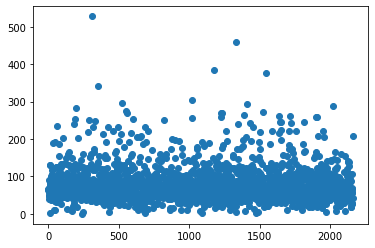

In [95]:
plt.scatter(x = np.arange(0,len(y_pred)), y = y_pred)

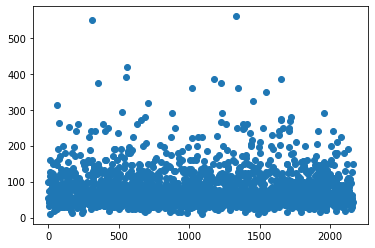

In [96]:
plt.scatter(x = np.arange(0,len(y_pred)), y = y_test)

In [97]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C = 1, epsilon=0.2)
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
sklearn.metrics.r2_score(y_test, y_pred_svr)


0.720412529675932

In [126]:
np.where(feature.columns == 'Anandapura')[0][0]

18

In [116]:
feature.columns[4:]

Index([' Devarachikkanahalli', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'],
      dtype='object', length=215)

In [118]:
def model_predict_function(location, total_sqft, bath,balcony,bhk):
    index = np.where(feature.columns == location)[0][0]
    
    x = np.zeros(len(feature.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if index >= 0:
        x[index] = 1
    
    return le.predict([x])

In [125]:
model_predict_function('Anandapura', 1630, 3, 2,2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([91.12095558])

In [122]:
model_predict_function('1st Phase JP Nagar',1000, 2, 3,1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([93.1040938])